# Toronto Neighbourhood Starbucks Analysis r1


This analysis take the most popular venue information and tries to determine the best target areas for starbucks expansion based upon underserved markets. The highest rated ensures in the 1st and 2nd category for coffee houses will be used along with the count of starbucks in thos neighborhoods to get a locations per neighboorhood. I will also try to normalize the data with population data.

In [1]:
#pip install beautifulsoup4
import pip
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
#soup.head(5)
import requests
%pip install BeautifulSoup4

from bs4 import BeautifulSoup 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py

Now scrap data set using Pandas Command
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M


In [17]:
#url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

req = requests.get("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=prev&oldid=1012023397") 
soup = BeautifulSoup(req.content,'lxml') 
table = soup.find_all('table')[0]  
df = pd.read_html(str(table)) 
neighborhood=pd.DataFrame(df[0])

In [18]:
print(neighborhood)

    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
2

In [19]:
toronto1 = neighborhood.copy()

## File changed, need to split the first 3 charcters of the string to create postal code

In [20]:
toronto1.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [22]:
# Adding two new columns to the existing dataframe. 
# bydefault splitting is done on the basis of single space. 
#toronto1[['First','Last']] = df.Name.str.split(expand=True) 
   
#print("\n After adding two new columns : \n", df) 

In [23]:
#toronto1 =toronto1[toronto1.Borough != 'Not Assigned']
toronto1.groupby(['Postal Code', 'Borough'])['Neighbourhood']
toronto1.describe()

,Postal Code,Borough,Neighbourhood
count,180,180,180
unique,180,12,100
top,M1M,Not assigned,Not assigned
freq,1,77,77


In [24]:
toronto1.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [25]:
### Get indexes where name column has value Not assigned
toronto2 = toronto1[toronto1.Neighbourhood != 'Not assigned']
toronto2.head(10)

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [26]:
#Fix Index
toronto2.reset_index(inplace=True)
#del toronto2['index']
#del toronto2['level_0']
toronto2.head()


,index,Postal Code,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [27]:
del toronto2['index']
#del toronto2['level_0']
toronto2.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [28]:
toronto2.shape

(103, 3)

In [29]:
lat_long_coords = pd.read_csv("Geospatial_Coordinates.csv")

In [30]:
lat_long_coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [31]:
toronto3 = pd.merge(left=toronto2, right=lat_long_coords, left_on='Postal Code', right_on='Postal Code')

# What's the size of the output data?
toronto3.shape

(103, 5)

In [32]:
toronto3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


This is the 3rd part of the assignment from Week 3

In [33]:
toronto3.describe(include=[np.object])

,Postal Code,Borough,Neighbourhood
count,103,103,103
unique,103,11,99
top,M4G,North York,Downsview
freq,1,24,4


In [34]:
toronto4 = toronto3.copy()

In [35]:
print('The dataframe has {} boroughs and {} neighbourhoods.'.format(
        len(toronto4['Borough'].unique()),
        toronto4.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighbourhoods.


In [36]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [37]:
toronto4.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [38]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto4['Latitude'], toronto4['Longitude'], toronto4['Borough'], toronto4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [39]:
#toronto5 = toronto4[toronto4['Borough'] == 'Toronto'].reset_index(drop=True)
#toronto5.head()
# keep all boroughs for now.

#### Define Foursquare Credentials and Version

In [40]:
CLIENT_ID = 'BJTJWBWCY5P5U4G5N2YKZGDFPBW34COXOT1IBXAWS5QDDL3R' # your Foursquare ID
CLIENT_SECRET = 'KSCHDHKLFJBQDWO511KOYWCBBJIFXOPJPTVAUJD12GV4KMFM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJTJWBWCY5P5U4G5N2YKZGDFPBW34COXOT1IBXAWS5QDDL3R
CLIENT_SECRET:KSCHDHKLFJBQDWO511KOYWCBBJIFXOPJPTVAUJD12GV4KMFM


# Get the Item data for all boroughs

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
toronto5 = toronto4.copy()

In [43]:
toronto5.loc[0, 'Neighbourhood']

'Parkwoods'

In [44]:
neighborhood_latitude = toronto5.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto5.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto5.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [45]:
# type your answer here
#<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API


#<!--
radius = 500 # define radius
#-->

#<!--
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
#--> 


'https://api.foursquare.com/v2/venues/explore?&client_id=BJTJWBWCY5P5U4G5N2YKZGDFPBW34COXOT1IBXAWS5QDDL3R&client_secret=KSCHDHKLFJBQDWO511KOYWCBBJIFXOPJPTVAUJD12GV4KMFM&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [46]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '604e1cfdc0470e3e318f97fb'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [47]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,649 Variety,Convenience Store,43.754513,-79.331942
2,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [48]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


# EXPLORE Neighbourhoods in Toronto with Foursquare

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
# type your answer here
# function that extracts the category of the venue
toronto_venues = getNearbyVenues(names=toronto4['Neighbourhood'],
                                   latitudes=toronto4['Latitude'],
                                   longitudes=toronto4['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [51]:
print(toronto_venues.shape)
toronto_venues.head()

(2101, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,649 Variety,43.754513,-79.331942,Convenience Store
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [52]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",24,24,24,24,24,24
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,59,59,59,59,59,59
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",13,13,13,13,13,13


In [53]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


#### INVESTIGATE each neighbourhood

In [54]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [55]:
toronto_onehot.shape

(2101, 268)

In [56]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000

In [57]:
toronto_grouped.shape

(95, 268)

In [58]:
num_top_venues = 5

#for hood in toronto_grouped['Neighborhood']:
#    print("----"+hood+"----")
#    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
#    temp.columns = ['venue','freq']
#    temp = temp.iloc[1:]
#    temp['freq'] = temp['freq'].astype(float)
#    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Ethiopian Restaurant,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Fried Chicken Joint,Bridal Shop,Sandwich Place,Diner,Restaurant,Intersection,Deli / Bodega,Supermarket
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Liquor Store,Toy / Game Store,Café,Restaurant,Sushi Restaurant,Pub,Fast Food Restaurant


In [61]:
# set number of clusters
#kclusters = 5

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

# Now Read the CSV file for Starbucks Data

In [62]:
starbucks = pd.read_csv("Starbucks_locations2.csv")

In [63]:
starbucks.head()

,ID,Lat,Long,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,75921-104040,43.086574,-79.059356,43.086904,-79.059375,1.0,rooftop,300,3rd St,NaN,NaN,Niagara Falls,NY,Niagara County,14303,US,"NYS GIS Program Office, State Geographic Infor..."
1,3997-146205,43.077276,-79.082792,43.077258,-79.083089,1.0,rooftop,6755,Fallsview Blvd,NaN,NaN,Niagara Falls,ON,NaN,L2G,CA,Niagara Region
2,75525-35359,43.078906,-79.081879,43.079035,-79.082146,1.0,rooftop,6732,Fallsview Blvd,NaN,NaN,Niagara Falls,ON,NaN,L2G,CA,City of Niagara Falls
3,75633-86381,43.079703,-79.082204,43.079510,-79.082067,1.0,rooftop,6700,Fallsview Blvd,NaN,NaN,Niagara Falls,ON,NaN,L2E,CA,City of Niagara Falls
4,75790-96396,43.082189,-79.082469,43.082574,-79.083232,1.0,rooftop,6361,Fallsview Blvd,NaN,NaN,Niagara Falls,ON,NaN,L2E,CA,Niagara Region


# Find counts of Starbucks locations by Postal Code


In [64]:
starbucks.groupby('Zip').count()

,ID,Lat,Long,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Country,Source
Zip,,,,,,,,,,,,,,,,
14303,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
L0P,2,2,2,2,2,2,2,2,2,0,0,2,2,0,2,2
L0R,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
L0S,3,3,3,3,3,3,3,3,3,0,0,3,3,0,3,3
L1T,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
L1V,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
L1W,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
L1Z,3,3,3,3,3,3,3,3,3,0,0,3,3,0,3,3
L2E,10,10,10,10,10,10,10,10,10,0,0,10,10,0,10,10


In [65]:
starbucks2 = starbucks.groupby('Zip').count().reset_index()
#torontocovid2 = covid19.groupby('Neighbourhood Name')[['Outbreak Associated','Age Group']].apply(lambda x: (x.'Outbreak Associated'.max(),x.'Age Group'.mean())).apply(covid19
#neighborhoods_venues_sorted.head(20)
starbucks2.head()

,Zip,ID,Lat,Long,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Country,Source
0,14303,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
1,L0P,2,2,2,2,2,2,2,2,2,0,0,2,2,0,2,2
2,L0R,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
3,L0S,3,3,3,3,3,3,3,3,3,0,0,3,3,0,3,3
4,L1T,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1


# Get neighborrhoods on venues sorted

# Merge toronto2 (postal codes) with the venues_sorted file

In [66]:
neighborhoods_venues_sorted2 = pd.merge(left=neighborhoods_venues_sorted, right=toronto2, left_on='Neighborhood', right_on='Neighbourhood')

# What's the size of the output data?
neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Neighbourhood
0,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Ethiopian Restaurant,Drugstore,M1S,Scarborough,Agincourt
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M8W,Etobicoke,"Alderwood, Long Branch"
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Fried Chicken Joint,Bridal Shop,Sandwich Place,Diner,Restaurant,Intersection,Deli / Bodega,Supermarket,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,M2K,North York,Bayview Village
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Liquor Store,Toy / Game Store,Café,Restaurant,Sushi Restaurant,Pub,Fast Food Restaurant,M5M,North York,"Bedford Park, Lawrence Manor East"


# MERGE sorted venues with starbucks2 file to connect Zip/Postal Code

In [67]:
torontostarbucks = pd.merge(left=neighborhoods_venues_sorted2, right=starbucks2, left_on='Postal Code', right_on='Zip')

# What's the size of the output data?
torontostarbucks.shape

(64, 31)

In [68]:
#torontostarbucks.head(10)
#torontostarbucks.to_csv (r'C:\ThisPC\Desktop\torontostarbucks.csv', index = False, header=True)
torontostarbucks6 = pd.read_csv("torontostarbucks6.csv")
torontostarbucks6.head()

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Neighbourhood,Zip,ID,Lat,Long,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Country,Source
0,Agincourt,44557.0,Skating Rink,Lounge,Latin American Restaurant,Breakfast Spot,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,M1S,Scarborough,Agincourt,M1S,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
1,"Alderwood, Long Branch",21281.0,Pizza Place,Gym,Coffee Shop,Skating Rink,Pub,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,M8W,Etobicoke,"Alderwood, Long Branch",M8W,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,Coffee Shop,Bank,Pharmacy,Fried Chicken Joint,Shopping Mall,Bridal Shop,Diner,Sandwich Place,Deli / Bodega,Middle Eastern Restaurant,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",M3H,2,2,2,2,2,2,2,2,2,0,0,2,2,0,2,2
3,Bayview Village,12280.0,Japanese Restaurant,Café,Bank,Chinese Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store,M2K,North York,Bayview Village,M2K,3,3,3,3,3,3,3,3,3,0,0,3,3,0,3,3
4,"Bedford Park, Lawrence Manor East",27499.0,Italian Restaurant,Coffee Shop,Sandwich Place,Women's Store,Butcher,Restaurant,Café,Pub,Pizza Place,Comfort Food Restaurant,M5M,North York,"Bedford Park, Lawrence Manor East",M5M,4,4,4,4,4,4,4,4,4,0,0,4,4,0,4,4


In [69]:
torontostarbucks6["Starbucksperperson"] = (torontostarbucks6["Population"] / torontostarbucks6["Number"] )

In [70]:
torontostarbucks6.head()

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postal Code,Borough,Neighbourhood,Zip,ID,Lat,Long,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Country,Source,Starbucksperperson
0,Agincourt,44557.0,Skating Rink,Lounge,Latin American Restaurant,Breakfast Spot,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,M1S,Scarborough,Agincourt,M1S,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,44557.000000
1,"Alderwood, Long Branch",21281.0,Pizza Place,Gym,Coffee Shop,Skating Rink,Pub,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,M8W,Etobicoke,"Alderwood, Long Branch",M8W,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,21281.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,Coffee Shop,Bank,Pharmacy,Fried Chicken Joint,Shopping Mall,Bridal Shop,Diner,Sandwich Place,Deli / Bodega,Middle Eastern Restaurant,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",M3H,2,2,2,2,2,2,2,2,2,0,0,2,2,0,2,2,32645.000000
3,Bayview Village,12280.0,Japanese Restaurant,Café,Bank,Chinese Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store,M2K,North York,Bayview Village,M2K,3,3,3,3,3,3,3,3,3,0,0,3,3,0,3,3,4093.333333
4,"Bedford Park, Lawrence Manor East",27499.0,Italian Restaurant,Coffee Shop,Sandwich Place,Women's Store,Butcher,Restaurant,Café,Pub,Pizza Place,Comfort Food Restaurant,M5M,North York,"Bedford Park, Lawrence Manor East",M5M,4,4,4,4,4,4,4,4,4,0,0,4,4,0,4,4,6874.750000


# Now extract data required to test how many Starbucks per popular Neighbourhood

In [71]:
torontostarbucks7 = torontostarbucks6[["Neighborhood", "Population", "Starbucksperperson", "1st Most Common Venue", "2nd Most Common Venue"]] #, "2nd Most Common Venue", "3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue"]]
torontostarbucks7.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
0,Agincourt,44557.0,44557.000000,Skating Rink,Lounge
1,"Alderwood, Long Branch",21281.0,21281.000000,Pizza Place,Gym
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank
3,Bayview Village,12280.0,4093.333333,Japanese Restaurant,Café
4,"Bedford Park, Lawrence Manor East",27499.0,6874.750000,Italian Restaurant,Coffee Shop


In [72]:
contain_values1 = torontostarbucks7[torontostarbucks7['1st Most Common Venue'].str.contains('Cof|Caf')]
contain_values1.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank
5,Berczy Park,NaN,NaN,Coffee Shop,Cocktail Bar
7,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop
10,Central Bay Street,4787.0,398.916667,Coffee Shop,Italian Restaurant
12,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant


In [73]:
contain_values2 = torontostarbucks7[torontostarbucks7['2nd Most Common Venue'].str.contains('Cof|Caf')]
contain_values2.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
3,Bayview Village,12280.0,4093.333333,Japanese Restaurant,Café
4,"Bedford Park, Lawrence Manor East",27499.0,6874.750000,Italian Restaurant,Coffee Shop
6,"Birch Cliff, Cliffside West",21652.0,21652.000000,College Stadium,Café
7,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop
11,Christie,5124.0,2562.000000,Grocery Store,Café


In [74]:
torontostarbucks8 = pd.concat([contain_values1, contain_values2], axis=0)
torontostarbucks8.head(20)

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank
5,Berczy Park,NaN,NaN,Coffee Shop,Cocktail Bar
7,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop
10,Central Bay Street,4787.0,398.916667,Coffee Shop,Italian Restaurant
12,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant
23,"Garden District, Ryerson",8240.0,2060.000000,Coffee Shop,Clothing Store
25,"Harbourfront East, Union Station, Toronto Islands",14995.0,2499.166667,Coffee Shop,Aquarium
29,"Kensington Market, Chinatown, Grange Park",12747.0,6373.500000,Café,Coffee Shop
38,"North Toronto West, Lawrence Park",6653.0,6653.000000,Coffee Shop,Clothing Store
42,"Regent Park, Harbourfront",24755.0,8251.666667,Coffee Shop,Bakery


In [75]:
torontostarbucks9 = torontostarbucks8.drop(torontostarbucks8.index[1])
torontostarbucks9.head(20)

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank
7,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop
10,Central Bay Street,4787.0,398.916667,Coffee Shop,Italian Restaurant
12,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant
23,"Garden District, Ryerson",8240.0,2060.000000,Coffee Shop,Clothing Store
25,"Harbourfront East, Union Station, Toronto Islands",14995.0,2499.166667,Coffee Shop,Aquarium
29,"Kensington Market, Chinatown, Grange Park",12747.0,6373.500000,Café,Coffee Shop
38,"North Toronto West, Lawrence Park",6653.0,6653.000000,Coffee Shop,Clothing Store
42,"Regent Park, Harbourfront",24755.0,8251.666667,Coffee Shop,Bakery
43,"Richmond, Adelaide, King",0.0,0.000000,Coffee Shop,Café


In [76]:
torontostarbucks9[torontostarbucks9.Population != 0]

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue
2,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank
7,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop
10,Central Bay Street,4787.0,398.916667,Coffee Shop,Italian Restaurant
12,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant
23,"Garden District, Ryerson",8240.0,2060.000000,Coffee Shop,Clothing Store
25,"Harbourfront East, Union Station, Toronto Islands",14995.0,2499.166667,Coffee Shop,Aquarium
29,"Kensington Market, Chinatown, Grange Park",12747.0,6373.500000,Café,Coffee Shop
38,"North Toronto West, Lawrence Park",6653.0,6653.000000,Coffee Shop,Clothing Store
42,"Regent Park, Harbourfront",24755.0,8251.666667,Coffee Shop,Bakery
45,"Runnymede, Swansea",15515.0,15515.000000,Coffee Shop,Café


# Merge with toronto4 dataset to plot the neighborhoods that have highest ranking of coffee/cafe choices

In [77]:
torontostarbucks10 = pd.merge(left=torontostarbucks9, right=toronto4, left_on='Neighborhood', right_on='Neighbourhood')

# What's the size of the output data?
torontostarbucks10.shape

(32, 10)

In [78]:
# create map of Toronto using latitude and longitude values
map_torontosb1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(torontostarbucks10['Latitude'], torontostarbucks10['Longitude'], torontostarbucks10['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torontosb1)  
    
map_torontosb1


In [79]:
torontostarbucks10["Starbucks"] = (torontostarbucks10["Population"] / torontostarbucks10["Starbucksperperson"] )

In [80]:
torontostarbucks10.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Starbucks
0,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,2.0
1,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
2,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
3,Central Bay Street,4787.0,398.916667,Coffee Shop,Italian Restaurant,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,12.0
4,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6.0


In [81]:
torontostarbucks10['Population'] = torontostarbucks10['Population'].replace([4787],25767)
torontostarbucks10.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Starbucks
0,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,2.0
1,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
2,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
3,Central Bay Street,25767.0,398.916667,Coffee Shop,Italian Restaurant,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,12.0
4,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6.0


In [103]:
#need to replace Cafe with Coffee Shop in data base and find 

# STOP HERE! need Kmeans after this and heat map!!!!

In [87]:
#Reduce data to values for Kmeans
torontostarbucks11 = torontostarbucks10[["Population", "Starbucksperperson", "Latitude", "Longitude", "Starbucks"]] 
torontostarbucks11.head()

,Population,Starbucksperperson,Latitude,Longitude,Starbucks
0,65290.0,32645.000000,43.754328,-79.442259,2.0
1,37406.0,9351.500000,43.636847,-79.428191,4.0
2,37406.0,9351.500000,43.636847,-79.428191,4.0
3,25767.0,398.916667,43.657952,-79.387383,12.0
4,13397.0,2232.833333,43.665860,-79.383160,6.0


In [88]:
map_torontosb2 = folium.Map(location=[latitude, longitude], zoom_start=10)
#SF_COORDINATES = (37.76, -122.45)
#crimedata = pd.read_csv('SFPD_Incidents_2015.csv')
 
# for speed purposes
#MAX_RECORDS = 1000
  
# create empty map zoomed in on San Francisco
#map = folium.Map(location=map_torontosb2, zoom_start=10)
 
# add a marker for every record in the filtered data, use a clustered view
for each in torontostarbucks10[0:200].iterrows():
    map.simple_marker(
        location = [each[1]['Latitude'],each[1]['Longitude']], 
        clustered_marker = False)
  
display(map_torontosb2)

AttributeError: type object 'map' has no attribute 'simple_marker'

# Now let's try a Kmeans analysis for the data set for Unsupervised learning to see if any cluster is a good choice

In [89]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [90]:
from sklearn.preprocessing import StandardScaler
X = torontostarbucks11.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 3.20972974,  1.82280707, -0.803869  , -0.26688026],
       [ 0.24992712, -0.99207046, -0.5532858 ,  0.58713656],
       [ 0.24992712, -0.99207046, -0.5532858 ,  0.58713656],
       [-0.88763828, -0.48638441,  0.17361728,  4.00320385],
       [-0.65461055, -0.29691867,  0.24883375,  1.44115338],
       [-0.67657172, -0.50532739,  0.32405199,  0.58713656],
       [-0.62076874, -0.89698418,  0.27390649,  1.44115338],
       [-0.12847424, -0.60011657, -0.05200717, -0.26688026],
       [-0.12847424, -0.60011657, -0.05200717, -0.26688026],
       [-0.09295941,  0.8896772 , -0.15227501, -0.69388867],
       [ 0.11017614, -0.57485767,  0.65004047,  0.16012815],
       [-0.93832686, -0.66323988,  0.223761  , -1.12089708],
       [-0.93832686, -0.66323988,  0.223761  , -1.12089708],
       [ 1.03309596, -0.63929399, -1.55538527, -0.69388867],
       [ 1.03309596, -0.63929399, -1.55538527, -0.69388867],
       [-0.0065548 , -0.64113174,  0.38673742, -0.26688026],
       [-0.0065548 , -0.

In [91]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 2 0 0 0 0 2 2 2 2 0 0 2 2 2 2 0 0 1 0 0 0 2 1 0 0 0 0 0 2 1]


In [92]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [93]:
torontostarbucks11["Clus_km"] = labels
torontostarbucks11.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Population,Starbucksperperson,Latitude,Longitude,Starbucks,Clus_km
0,65290.0,32645.000000,43.754328,-79.442259,2.0,1
1,37406.0,9351.500000,43.636847,-79.428191,4.0,2
2,37406.0,9351.500000,43.636847,-79.428191,4.0,2
3,25767.0,398.916667,43.657952,-79.387383,12.0,0
4,13397.0,2232.833333,43.665860,-79.383160,6.0,0


In [94]:
torontostarbucks11.groupby('Clus_km').mean()

,Population,Starbucksperperson,Latitude,Longitude,Starbucks
Clus_km,,,,,
0,8052.25,1854.593750,43.677123,-79.387454,4.363636
1,44084.25,24748.625000,43.703239,-79.364836,1.750000
2,20476.25,8969.895833,43.671428,-79.420795,2.416667


In [95]:
torontostarbucks11.head(32)

,Population,Starbucksperperson,Latitude,Longitude,Starbucks,Clus_km
0,65290.0,32645.000000,43.754328,-79.442259,2.0,1
1,37406.0,9351.500000,43.636847,-79.428191,4.0,2
2,37406.0,9351.500000,43.636847,-79.428191,4.0,2
3,25767.0,398.916667,43.657952,-79.387383,12.0,0
4,13397.0,2232.833333,43.665860,-79.383160,6.0,0
5,8240.0,2060.000000,43.657162,-79.378937,4.0,0
6,14995.0,2499.166667,43.640816,-79.381752,6.0,0
7,12747.0,6373.500000,43.653206,-79.400049,2.0,2
8,12747.0,6373.500000,43.653206,-79.400049,2.0,2
9,6653.0,6653.000000,43.715383,-79.405678,1.0,2


In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torontostarbucks10['Latitude'], torontostarbucks10['Longitude'], torontostarbucks10['Neighbourhood'], torontostarbucks10['Clus_km']):
    label = folium.Popup(str(poi) + ' Clus_km ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    #folium.map.LayerControl('topleft', collapsed=False).add_to(map_clusters)
    #map_clusters.add_child(folium.Popup(Cluster))
       
map_clusters

NameError: name 'kclusters' is not defined

# Let's Plot a heirarchical Kmeans cluster diagram

In [97]:
#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch


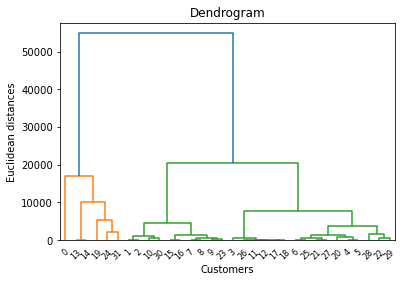

In [98]:
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [108]:
torontostarbucks10.head(40)

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Starbucks
0,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,2.0
1,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
2,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
3,Central Bay Street,25767.0,398.916667,Coffee Shop,Italian Restaurant,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,12.0
4,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6.0
5,"Garden District, Ryerson",8240.0,2060.000000,Coffee Shop,Clothing Store,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4.0
6,"Harbourfront East, Union Station, Toronto Islands",14995.0,2499.166667,Coffee Shop,Aquarium,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,6.0
7,"Kensington Market, Chinatown, Grange Park",12747.0,6373.500000,Café,Coffee Shop,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,2.0
8,"Kensington Market, Chinatown, Grange Park",12747.0,6373.500000,Café,Coffee Shop,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,2.0
9,"North Toronto West, Lawrence Park",6653.0,6653.000000,Coffee Shop,Clothing Store,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,1.0


In [99]:
#4 Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')


In [100]:
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(X)

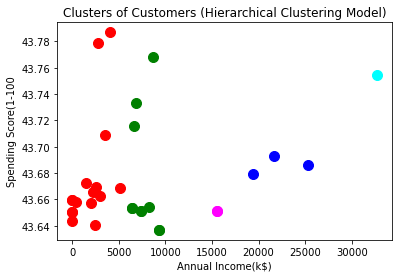

In [101]:
#5 Visualizing the clusters. This code is similar to k-means #visualization code. We only replace the y_kmeans vector name to #y_hc for the hierarchical clustering
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [105]:
#Table analysis for best locations requries data cleaning and sorting
torontostarbucks12 = torontostarbucks10.copy()
#toronto5 = toronto4.copy()
torontostarbucks12.head()

,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Starbucks
0,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,2.0
1,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
2,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Café,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
3,Central Bay Street,25767.0,398.916667,Coffee Shop,Italian Restaurant,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,12.0
4,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6.0


In [106]:
torontostarbucks12['1st Most Common Venue'] = torontostarbucks12['1st Most Common Venue'].replace(['Café'],'Coffee Shop')
torontostarbucks12['2nd Most Common Venue'] = torontostarbucks12['2nd Most Common Venue'].replace(['Café'],'Coffee Shop')
torontostarbucks12.groupby(['Starbucksperperson']).size().sort_values()
torontostarbucks12.head()


,Neighborhood,Population,Starbucksperperson,1st Most Common Venue,2nd Most Common Venue,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Starbucks
0,"Bathurst Manor, Wilson Heights, Downsview North",65290.0,32645.000000,Coffee Shop,Bank,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,2.0
1,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Coffee Shop,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
2,"Brockton, Parkdale Village, Exhibition Place",37406.0,9351.500000,Coffee Shop,Coffee Shop,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,4.0
3,Central Bay Street,25767.0,398.916667,Coffee Shop,Italian Restaurant,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,12.0
4,Church and Wellesley,13397.0,2232.833333,Coffee Shop,Sushi Restaurant,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,6.0
